<a href="https://colab.research.google.com/github/jonmontg/weather_prediction/blob/main/seattle_weather_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Weather Classification for Seattle:<br>
In this project, I will use the following models to classify the Seattle's weather:
* SVM
* Naive Bayes
* Random Forest

I sourced the data from the [Kaggle WEATHER PREDICTION dataset](https://www.kaggle.com/datasets/ananthr1/weather-prediction).

In [97]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import ttest_ind
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("seattle-weather.csv")

#1. Exploring the data

In [8]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [27]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


## Null values

In [64]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

## Distribution

<Axes: xlabel='weather', ylabel='count'>

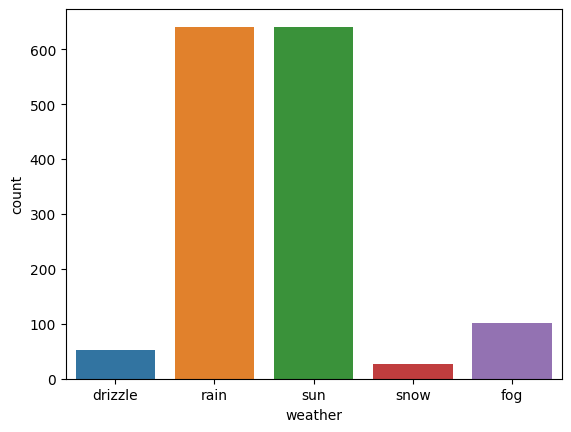

In [24]:
sns.countplot(data=df, x="weather")

The data set contains more information for rainy and sunny days that drizzle, snow, or fog.

##Evaluating Skew

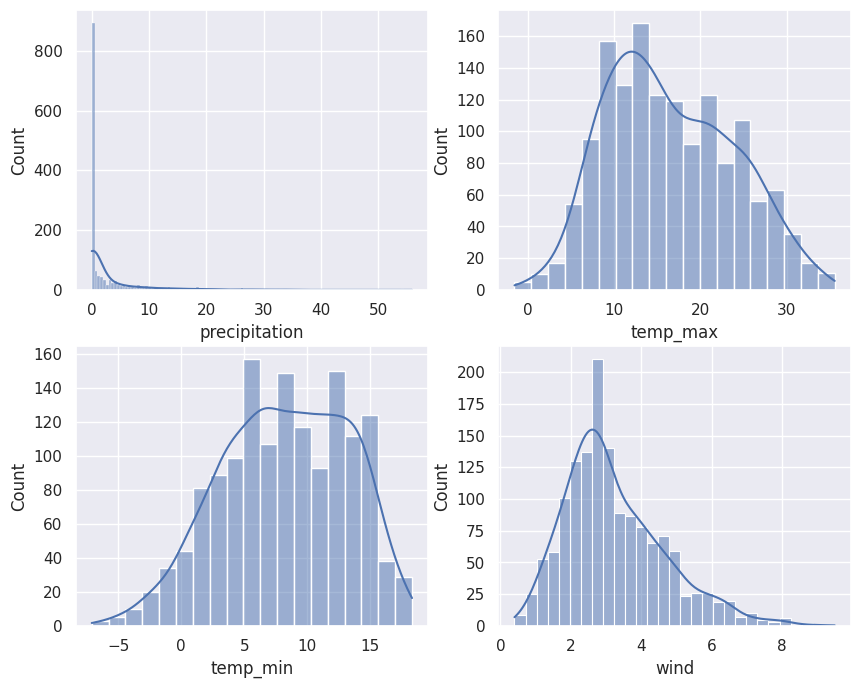

Plot Skew
precipitation: 3.502043
temp_max:      0.280641
temp_min:      -0.249202
wind:          0.890752


In [42]:
fig, axs = plt.subplots(2, 2, figsize=(10,8))
sns.histplot(data=df, x="precipitation", kde=True, ax=axs[0,0])
sns.histplot(data=df, x="temp_max", kde=True, ax=axs[0,1])
sns.histplot(data=df, x="temp_min", kde=True, ax=axs[1,0])
sns.histplot(data=df, x="wind", kde=True, ax=axs[1,1])
plt.show()

print("Plot Skew")
print("=========")
print("precipitation: %f" % skew(df["precipitation"]))
print("temp_max:      %f" % skew(df["temp_max"]))
print("temp_min:      %f" % skew(df["temp_min"]))
print("wind:          %f" % skew(df["wind"]))

###Outliers

<Axes: xlabel='precipitation', ylabel='weather'>

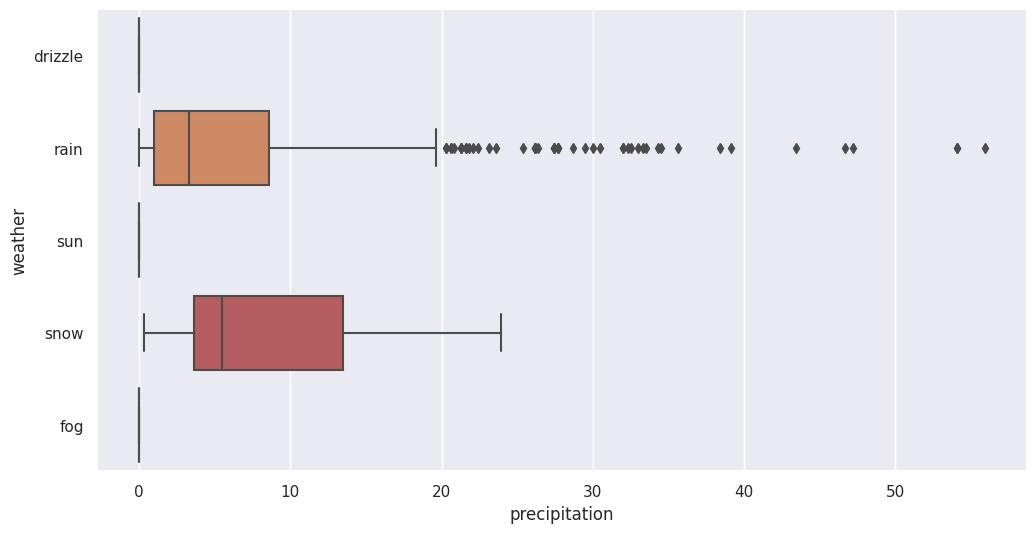

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="precipitation", y="weather")

<Axes: xlabel='temp_max', ylabel='weather'>

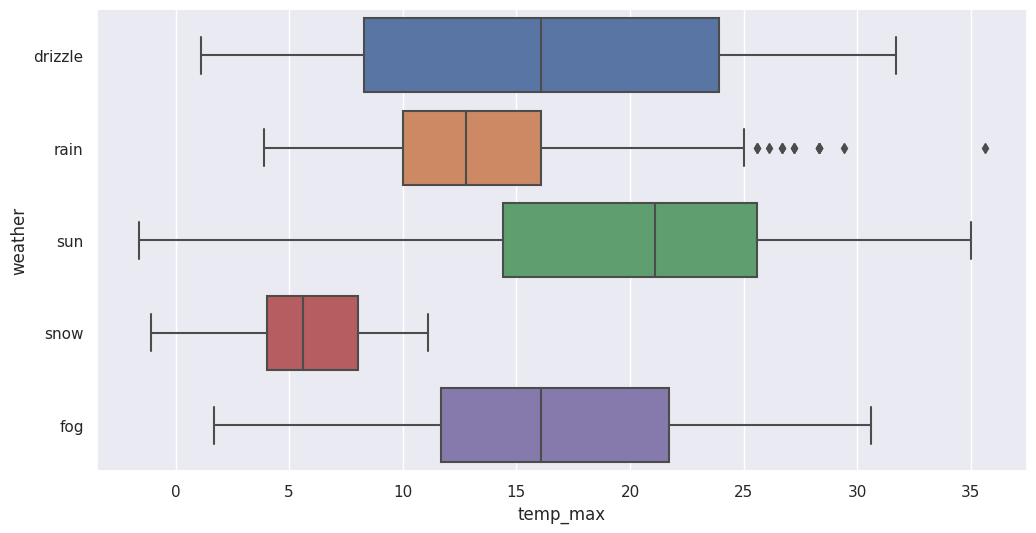

In [46]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="temp_max", y="weather")

<Axes: xlabel='temp_min', ylabel='weather'>

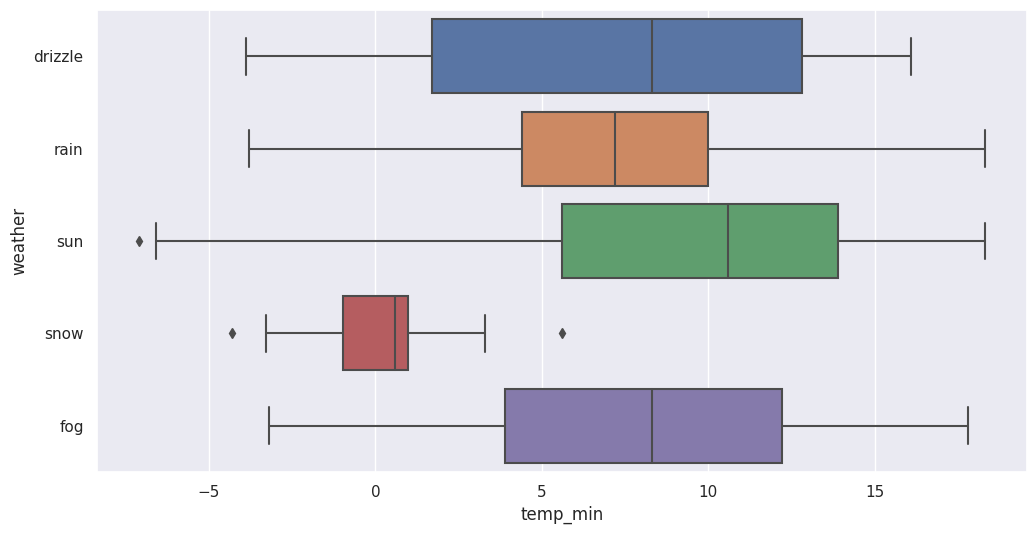

In [47]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="temp_min", y="weather")

<Axes: xlabel='wind', ylabel='weather'>

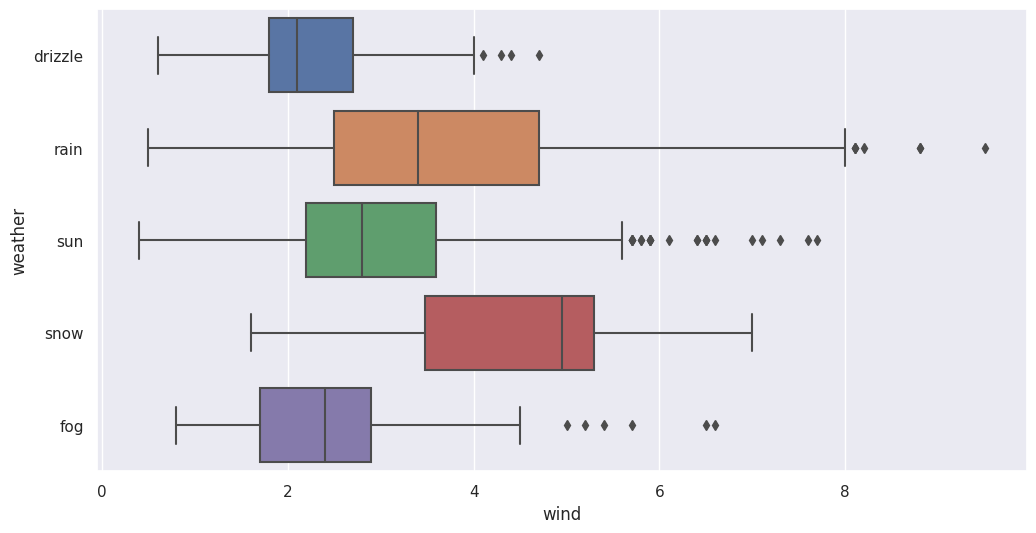

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="wind", y="weather")

##Variable Correlation

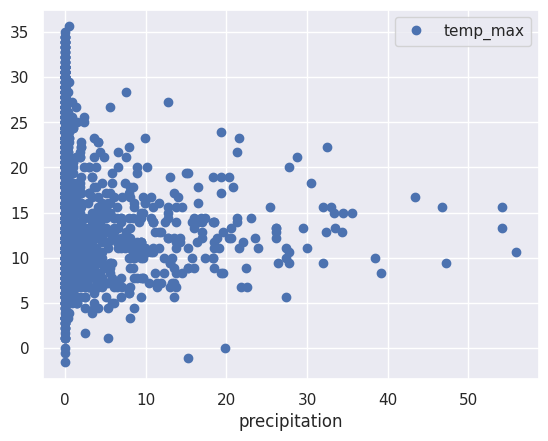

Correlation: -0.228555
T-Test and P-Value:  TtestResult(statistic=-51.60685279531918, pvalue=0.0, df=2920.0)


In [60]:
df.plot("precipitation", "temp_max", style="o")
plt.show()
print("Correlation: %f" % df["precipitation"].corr(df["temp_max"]))
print("T-Test and P-Value: ", ttest_ind(df["precipitation"], df["temp_max"]))

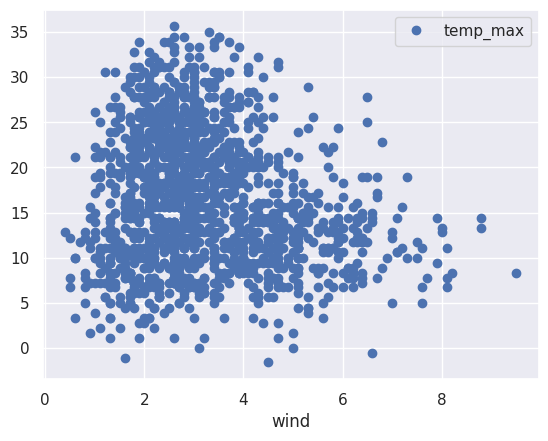

Correlation: -0.164857
T-Test and P-Value:  TtestResult(statistic=-67.3601643301846, pvalue=0.0, df=2920.0)


In [61]:
df.plot("wind", "temp_max", style="o")
plt.show()
print("Correlation: %f" % df["wind"].corr(df["temp_max"]))
print("T-Test and P-Value: ", ttest_ind(df["wind"], df["temp_max"]))

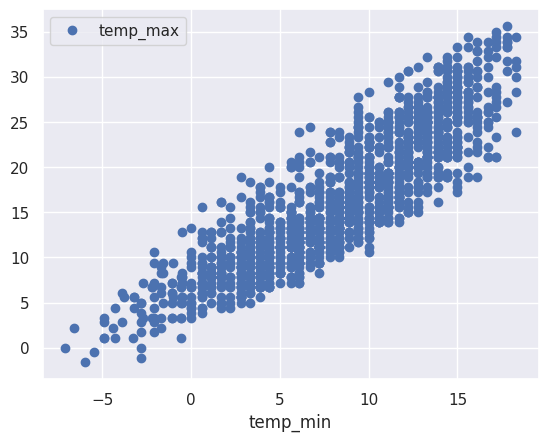

Correlation: 0.875687
T-Test and P-Value:  TtestResult(statistic=-35.22645781239284, pvalue=7.526905087245157e-227, df=2920.0)


In [63]:
df.plot("temp_min", "temp_max", style="o")
plt.show()
print("Correlation: %f" % df["temp_min"].corr(df["temp_max"]))
print("T-Test and P-Value: ", ttest_ind(df["temp_min"], df["temp_max"]))

# Pre-Processing

In [73]:
df = df.drop(columns=["date"])

In [85]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3-Q1
df[~((df.lt(Q1-1.5*IQR))| (df.gt(Q3+1.5*IQR))).any(axis=1)]

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
2,0.8,11.7,7.2,2.3,rain
4,1.3,8.9,2.8,6.1,rain
5,2.5,4.4,2.2,2.2,rain
6,0.0,7.2,2.8,2.3,rain
...,...,...,...,...,...
1455,0.0,4.4,0.0,2.5,sun
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [86]:
df.precipitation = np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)

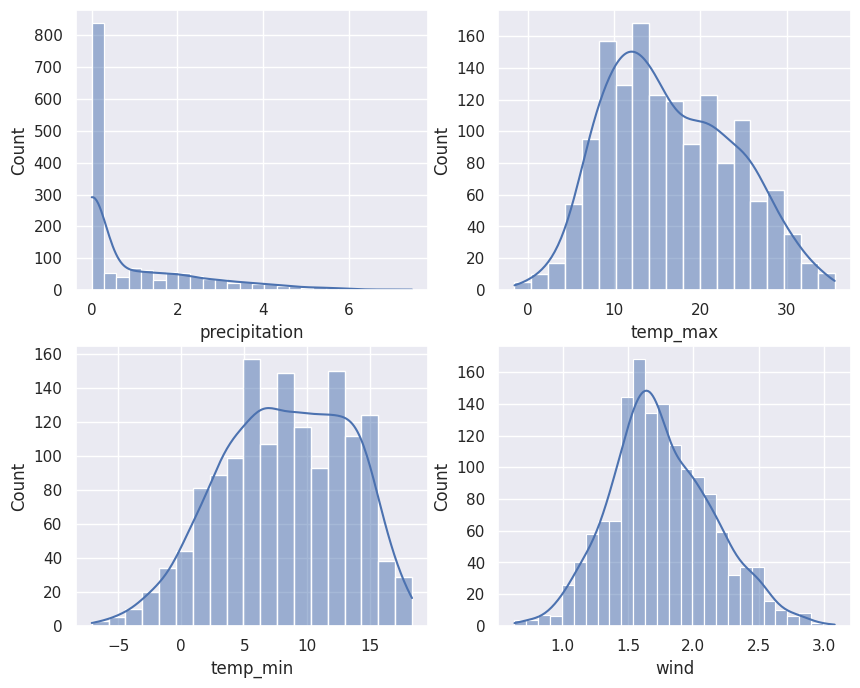

Plot Skew
precipitation: 1.605432
temp_max:      0.280641
temp_min:      -0.249202
wind:          0.281951


In [87]:
fig, axs = plt.subplots(2, 2, figsize=(10,8))
sns.histplot(data=df, x="precipitation", kde=True, ax=axs[0,0])
sns.histplot(data=df, x="temp_max", kde=True, ax=axs[0,1])
sns.histplot(data=df, x="temp_min", kde=True, ax=axs[1,0])
sns.histplot(data=df, x="wind", kde=True, ax=axs[1,1])
plt.show()

print("Plot Skew")
print("=========")
print("precipitation: %f" % skew(df["precipitation"]))
print("temp_max:      %f" % skew(df["temp_max"]))
print("temp_min:      %f" % skew(df["temp_min"]))
print("wind:          %f" % skew(df["wind"]))

###Encode weather

In [89]:
df["weather"] = LabelEncoder().fit_transform(df["weather"])

In [90]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2


In [91]:
x = df[["precipitation", "temp_max", "temp_min", "wind"]].values
y = df["weather"].values

In [93]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=1)

#Evaluating the Models

###SVM

In [101]:
svc_model = svm.SVC(kernel="linear")
svc_model.fit(train_x, train_y)
print("Accuracy: %f" % accuracy_score(svc_model.predict(test_x), test_y))

Accuracy: 0.835991


###Naive Bayes

In [103]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(train_x, train_y)
print("Accuracy: %f" % accuracy_score(naive_bayes_model.predict(test_x), test_y))

Accuracy: 0.845103


###Random Forest

In [107]:
rf_model = RandomForestClassifier(max_depth=3, random_state=1)
rf_model.fit(train_x, train_y)
print("Accuracy: %f" % accuracy_score(rf_model.predict(test_x), test_y))

Accuracy: 0.842825
